# Inaugural Project

# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

# Question 1

We illustrate set C within an Edgeworth box.

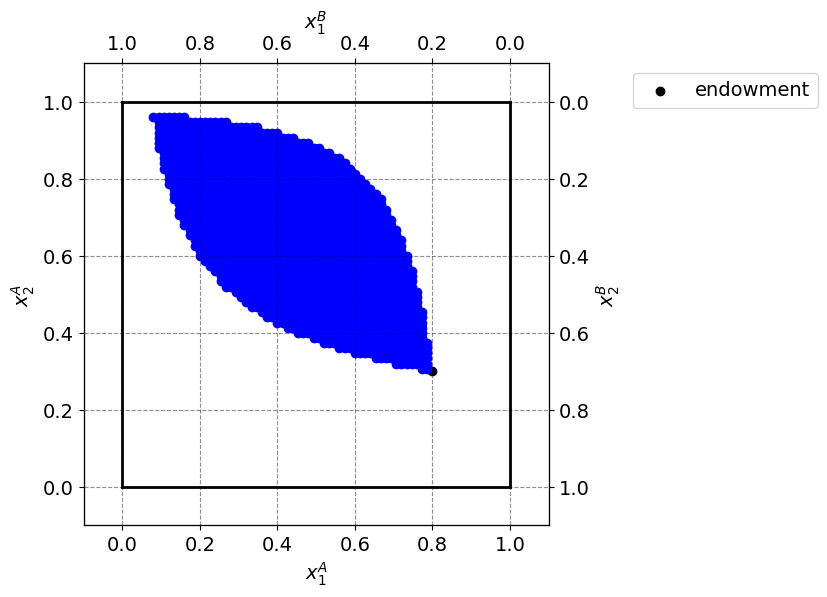

In [2]:
# We import the exchange economy
from inauguralproject import ExchangeEconomyClass

model = ExchangeEconomyClass()

par = model.par

# total endowment
w1bar = 1.0
w2bar = 1.0

# figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

# We define set C and plot the combinations of x1A and x2A
def set_C(x1A, x2A):
    return model.utility_A(x1A, x2A) >= model.utility_A(model.par.w1A, model.par.w2A) and \
           model.utility_B(1 - x1A, 1 - x2A) >= model.utility_B(1 - model.par.w1A, 1 - model.par.w2A)

N = 75
allocations = np.linspace(0, 1, N + 1)

for x1A in allocations:
    for x2A in allocations:
        if set_C(x1A, x2A):
            plt.plot(x1A, x2A, 'bo') 

# figure settings
ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

# initial endowment
ax_A.scatter(par.w1A,par.w2A,marker='o',color='black',label='endowment')
ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));


The combinations that are a pareto improvement are located to the north-west of the initial endowment.

# Question 2

We run through the prices between 0.5 and 2.5 in a loop to check the deviations from market clearing for good 1 and 2.

In [3]:
# We define the range of p1
N = 75
p1_range = np.linspace(0.5, 2.5, N + 1)

errors_1 = []
errors_2 = []

# We calculate the deviations
for p1 in p1_range:
    eps1, eps2 = model.check_market_clearing(p1)
    errors_1.append(eps1)
    errors_2.append(eps2)

print("Errors in market clearing conditions:")
for i, p1 in enumerate(p1_range):
    print(f"p1 = {p1:.4f}, ε1 = {errors_1[i]:.4f}, ε2 = {errors_2[i]:.4f}")

Errors in market clearing conditions:
p1 = 0.5000, ε1 = 0.5333, ε2 = -0.2667
p1 = 0.5267, ε1 = 0.4759, ε2 = -0.2507
p1 = 0.5533, ε1 = 0.4241, ε2 = -0.2347
p1 = 0.5800, ε1 = 0.3770, ε2 = -0.2187
p1 = 0.6067, ε1 = 0.3341, ε2 = -0.2027
p1 = 0.6333, ε1 = 0.2947, ε2 = -0.1867
p1 = 0.6600, ε1 = 0.2586, ε2 = -0.1707
p1 = 0.6867, ε1 = 0.2252, ε2 = -0.1547
p1 = 0.7133, ε1 = 0.1944, ε2 = -0.1387
p1 = 0.7400, ε1 = 0.1658, ε2 = -0.1227
p1 = 0.7667, ε1 = 0.1391, ε2 = -0.1067
p1 = 0.7933, ε1 = 0.1143, ε2 = -0.0907
p1 = 0.8200, ε1 = 0.0911, ε2 = -0.0747
p1 = 0.8467, ε1 = 0.0693, ε2 = -0.0587
p1 = 0.8733, ε1 = 0.0489, ε2 = -0.0427
p1 = 0.9000, ε1 = 0.0296, ε2 = -0.0267
p1 = 0.9267, ε1 = 0.0115, ε2 = -0.0107
p1 = 0.9533, ε1 = -0.0056, ε2 = 0.0053
p1 = 0.9800, ε1 = -0.0218, ε2 = 0.0213
p1 = 1.0067, ε1 = -0.0371, ε2 = 0.0373
p1 = 1.0333, ε1 = -0.0516, ε2 = 0.0533
p1 = 1.0600, ε1 = -0.0654, ε2 = 0.0693
p1 = 1.0867, ε1 = -0.0785, ε2 = 0.0853
p1 = 1.1133, ε1 = -0.0910, ε2 = 0.1013
p1 = 1.1400, ε1 = -0.1029,

# Question 3

We find the price where the summed deviation is closest to 0.  

In [4]:
min_abs_error_index = np.argmin(np.abs(np.array(errors_1)) + np.abs(np.array(errors_2)))

market_clearing_price = p1_range[min_abs_error_index]

print(f"The market clearing price is {market_clearing_price:.3f}")

The market clearing price is 0.953


In [5]:
Allocation = model.demand_A(market_clearing_price)
print(Allocation)

(0.3715617715617716, 0.7084444444444444)


# Question 4a

We find the corresponding allocations to the prices and use argmax to find the price with highest utility for A.

In [6]:
# We calculate the utilities
a_utility = []

for p1 in p1_range:
    x1B, x2B = model.demand_B(p1)
    x1B = np.clip(x1B, 0, 1)
    x2B = np.clip(x2B, 0, 1)
    a_utility.append(((1 - x1B) ** par.alpha) * ((1 - x2B) ** par.beta))

# we maximize the utility for A
max_utility_index = np.argmax(a_utility)

optimal_price = p1_range[max_utility_index]
optimal_allocation = model.demand_A(optimal_price)

print("The optimal allocation is", optimal_allocation)
print(f"where the price is {optimal_price:.3f}")

The optimal allocation is (0.31967020023557124, 1.2062222222222223)
where the price is 1.887


# Question 4b

# Question 5a

We create a loop which finds the highest utility for A for all allocations in set C.

In [7]:
x1A_range = np.linspace(0, 1, 1000)
x2A_range = np.linspace(0, 1, 1000)

max_utility_A = 0
optimal_x1A = None
optimal_x2A = None

# We create a loop which checks if an allocation of x1A and x2A is in set C
for x1A in x1A_range:
    for x2A in x2A_range:
        if set_C(x1A, x2A):
            # We calculate the utility and if it is greater than the previous max utility it replaces it
            utility_A_value = model.utility_A(x1A, x2A)
            if utility_A_value > max_utility_A:
                max_utility_A = utility_A_value
                optimal_x1A = x1A
                optimal_x2A = x2A

print(f"The allocation with the highest utility for A in set C is ({optimal_x1A:.3f},{optimal_x2A:.3f})")
print(f"where the utility for A is {max_utility_A:.3f}")


The allocation with the highest utility for A in set C is (0.570,0.849)
where the utility for A is 0.743


# Question 5b

We maximize the utility of A but such that B is not worse of than in the initial endowment.

In [8]:
# We define the utility as negative
def neg_utility_to_maximize(x):
    xA1, xA2 = x
    return -model.utility_A(xA1, xA2)

# We set up the constraints
def constraint_func(x):
    xA1, xA2 = x
    return model.utility_B(1 - xA1, 1 - xA2) - model.utility_B(model.par.w1A, model.par.w2A)

bounds = [(0, 1), (0, 1)]

constraint = {'type': 'ineq', 'fun': constraint_func}

# We maximize by minimizing the negative utility
res = minimize(neg_utility_to_maximize, x0=[0.5, 0.5], bounds=bounds, constraints=constraint)

optimal_allocation = res.x

print("The optimal allocation for A with no further restrictions is", optimal_allocation)

The optimal allocation for A with no further restrictions is [0.28945891 0.61970314]


# Question 6a

We maximize the social planners problem.

In [9]:
# We deine the social planners problem
def neg_utility_to_maximize(x):
    xA1, xA2 = x
    return -(model.utility_A(xA1, xA2) + model.utility_B(1 - xA1, 1 - xA2))

bounds = [(0, 1), (0, 1)]

# We maximize by minimizing the negative utility
res = minimize(neg_utility_to_maximize, x0=[0.5, 0.5], bounds=bounds)

optimal_allocation = res.x
allocation_B = [1-0.33333335, 1-0.66666662]

print("The optimal allocation for A is", optimal_allocation)
print("The optimal allocation for B is", allocation_B)

The optimal allocation for A is [0.33333335 0.66666662]
The optimal allocation for B is [0.66666665, 0.33333338]


# Question 6b

We create an edgeworth box with the allocations found in question 3-5.

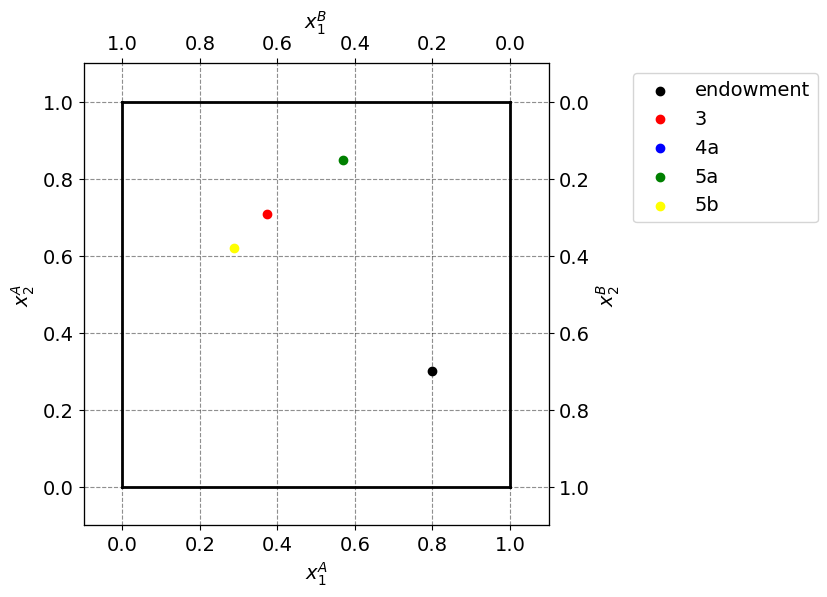

In [10]:
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# We plot our different allocations
ax_A.scatter(par.w1A,par.w2A,marker='o',color='black',label='endowment')
ax_A.scatter(0.372,0.708,marker='o',color='red',label='3')
ax_A.scatter(0.320,1.206,marker='o',color='blue',label='4a')
ax_A.scatter(0.570,0.849,marker='o',color='green',label='5a')
ax_A.scatter(0.289,0.620,marker='o',color='yellow',label='5b')

ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

# Question 7

We generate a set W with 50 random endowments from an uniform distribution.

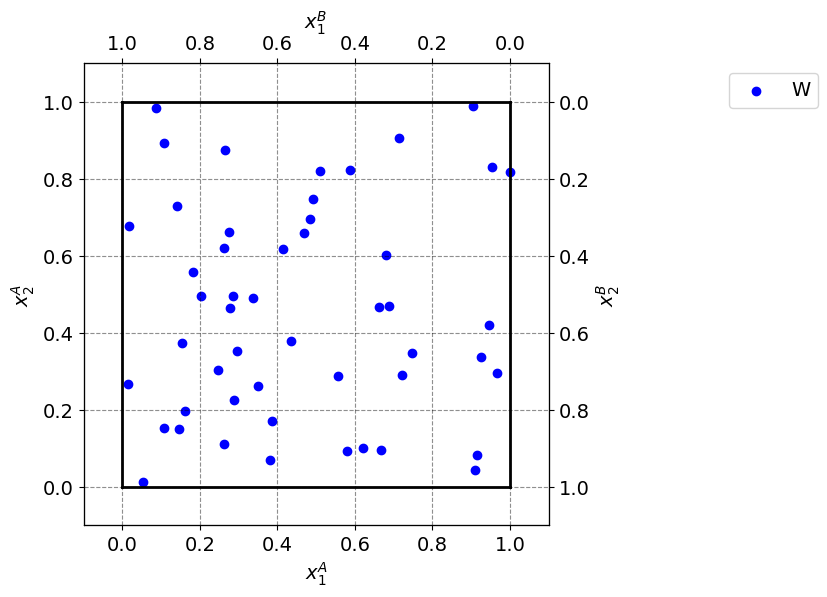

In [11]:
np.random.seed(69420666)
num_elements = 50
W = np.random.rand(num_elements, 2)

# we create an edgeworth box and illustrate the endowments
fig = plt.figure(frameon=False, figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.scatter(W[:,0], W[:,1], marker='o', color='blue', label='W')

# figure settings
ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))

plt.show()

# Question 8